In [13]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

csv = np.genfromtxt('uranium_test_2019-02-19_D3S.csv', delimiter= ",").T

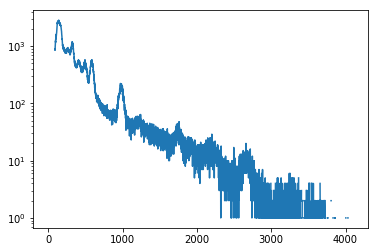

In [14]:
summed = np.sum(csv, axis=1)
plt.plot(summed)
plt.yscale('log')
plt.show()

In [167]:
def checkShape(i, data, r, e):
    sweep = [data[i + dx] for dx in range(-r, r+1)]
    prev=sweep[r]
    if not prev == max(sweep): #or prev < np.average(data)/4:
        return False
    if not prev > np.average(sweep) * 1.5:
        return False
    for k in range(1, r+1):
        if e < 0:
            return False
        if sweep[r-k] > prev:
            e = e - 1
        prev = sweep[r-k]
    prev=sweep[r]
    for k in range(1, r+1):
        if e < 0:
            return False
        if sweep[r+k] > prev:
            e = e - 1
        prev = sweep[r+k]
    return e >= 0

def sweepLeft(data, r=60, e=50):
    bubbles = []
    index = r
    while index < len(data) - r:
        if checkShape(index, data, r, e):
            bubbles.append(index)
            index = index + r - e
        else:
            index += 1
    return bubbles

ldots = sweepLeft(summed)
print(ldots)

[142, 322, 589, 971, 2836, 2883, 2995, 3083, 3133, 3243, 3255, 3368, 3509, 3538, 3549, 3567, 3657, 3724, 3809, 3873, 3883, 3899, 3910, 3922, 3939, 3949, 3960, 3979, 4003]


[142, 322, 589, 971, 2836, 2883, 2995, 3083, 3133, 3243, 3255, 3368, 3509, 3538, 3549, 3567, 3657, 3724, 3809, 3873, 3883, 3899, 3910, 3922, 3939, 3949, 3960, 3979, 4003]
29
33.2431030273


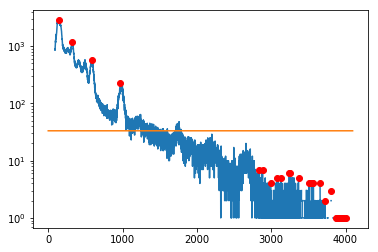

In [172]:
ldots = sweepLeft(summed, 60, 50)
print(ldots)
print(len(ldots))
print(np.average(summed)/4)
x=np.arange(len(summed))
plt.plot(summed)
plt.plot(x, np.average(summed)/4 + 0*x)
plt.plot(ldots, summed[ldots], 'ro')
plt.yscale('log')
plt.show()


[135, 393, 925, 2394]
4
201.533569336


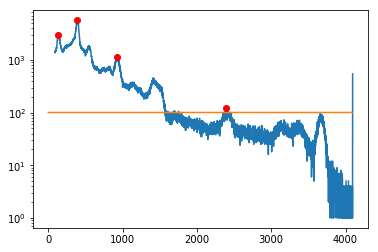

In [142]:
tsv = np.genfromtxt('thorium_test_2019-02-19_D3S.csv', delimiter= ",").T
thor = np.sum(tsv, axis=1)
tdots = sweepLeft(thor, 100, 99)
print(tdots)
print(len(tdots))
print(np.average(thor)/4)
x=np.arange(len(thor))
plt.plot(thor)
plt.plot(x, np.average(thor/4) + 0*x)
plt.plot(tdots, thor[tdots], 'ro')
plt.yscale('log')
plt.show()


[147, 2237]
2
6.16381835938


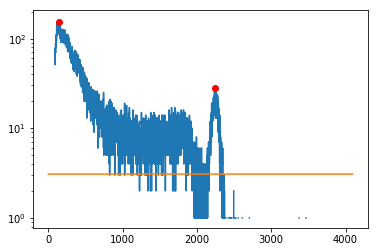

In [147]:
ksv = np.genfromtxt('k40_test_2019-02-11_D3S.csv', delimiter= ",").T
pot = np.sum(ksv, axis=1)
kdots = sweepLeft(pot, 100, 86)
print(kdots)
print(len(kdots))
print(np.average(pot)/2)
x=np.arange(len(pot))
plt.plot(pot)
plt.plot(x, np.average(pot)/4 + 0*x)
plt.plot(kdots, pot[kdots], 'ro')
plt.yscale('log')
plt.show()